<a href="https://colab.research.google.com/github/ankit-chhikara/house-dataset/blob/master/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House sales Kings county

This data is about the house sales in the Kings county in the USA. 
This is a city in USA which include Seattle also.

##About this file

This file contains 19 house features plus the price and the id columns, along with 21613 observations.

It have 21613 rows and 21 columns.

###column description

1. id:- a notation for a house

2. date:- Date house was sold

3. price:- Price is prediction target

4. bedrooms:- Number of Bedrooms/House

5. bathrooms:- Number of bathrooms/House

6. sqft_living:- Square footage of the home

7. sqft_lot:- Square footage of the lot

8. floors:- Total floors (levels) in house

9. waterfront:- House which has a view to a waterfront

10. view:- Has been viewed

11. condition:- How good the condition is ( Overall )

12. grade:- Overall grade given to the housing unit, based on King County grading system

13. sqft_above:- Square footage of house apart from basement

14. sqft_basement:- Square footage of the basement

15. yr_built:- Built Year

16. yr_renovated:- Year when house was renovated

17. zipcode:- zip

18. lat:- Latitude coordinate

19. long:- Longitude coordinate

20. sqft_living15:- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21. sqft_lot15:- lotSize area in 2015(implies-- some renovations)

##Data description

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [0]:
df=pd.read_csv('https://github.com/ankit-chhikara/house-dataset/blob/master/kc_house_data.csv?raw=true')

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.shape

(21613, 21)

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


we don't need id, zip code, lattiutde and longitude as they dont make any sense so we remove them


In [21]:
df.drop(['id','zipcode','lat','long'],axis=1).describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000


checking for the null values


In [17]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

###data preparation 
we are preparing data and checking for unsual data in the dataset

In [29]:
df[['bedrooms','sqft_living']].describe()

,bedrooms,sqft_living
count,21613.000000,21613.000000
mean,3.370842,2079.899736
std,0.930062,918.440897
min,0.000000,290.000000
25%,3.000000,1427.000000
50%,3.000000,1910.000000
75%,4.000000,2550.000000
max,33.000000,13540.000000


as this is showing max bedrooms to be 33 which look suspicious so we check that

In [26]:
df.query('bedrooms==33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


here the sqft_living of the house with 33 bedroom is 1620 which is around the average sqft_living 
also the average bedrooms are 3 so the data maybe wrong and we need to correct it

In [0]:
df['bedrooms'].replace(33,3,inplace= True)

In [31]:
df[['bedrooms']].describe()

,bedrooms
count,21613.000000
mean,3.369454
std,0.907964
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


In [32]:
df[['bathrooms']].describe()

,bathrooms
count,21613.000000
mean,2.114757
std,0.770163
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


#univariant analysis

##price

In [33]:
df[['price']].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


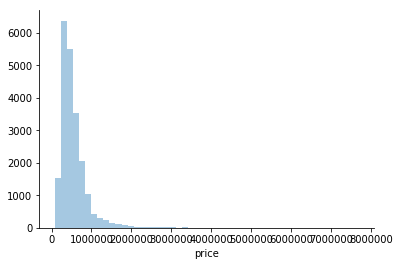

In [48]:
sns.distplot(df['price'],kde=False)
sns.despine()

we need to apply logrithmic operation on price so that data can become more readable

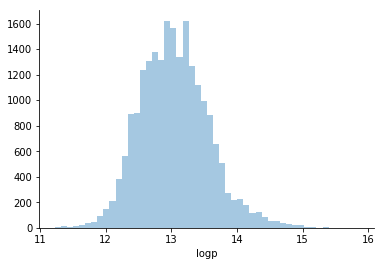

In [49]:
df['logp']=np.log(df['price'])
sns.distplot(df['logp'],kde=False)
sns.despine()

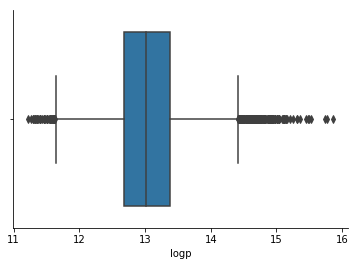

In [51]:
sns.boxplot(df['logp'])
sns.despine()

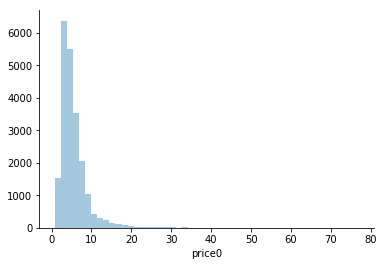

In [61]:
df['price0']=df['price']/100000
sns.distplot(df['price0'],kde=False)
sns.despine()

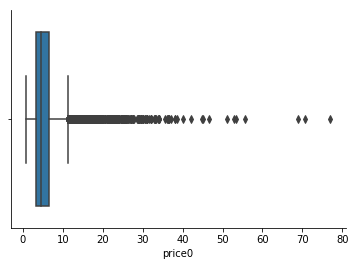

In [54]:
sns.boxplot(df['price0'])
sns.despine()

In [55]:
df[['price0']].describe()

,price0
count,21613.000000
mean,5.400881
std,3.671272
min,0.750000
25%,3.219500
50%,4.500000
75%,6.450000
max,77.000000


this shows that the average price of the houses = $ 5,40,000

with costliest house = $77 millions



##bedrooms

In [56]:
df[['bedrooms']].describe()

,bedrooms
count,21613.000000
mean,3.369454
std,0.907964
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


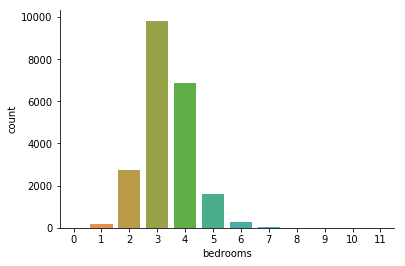

In [59]:
sns.countplot(x='bedrooms',data=df[['bedrooms']])
sns.despine()

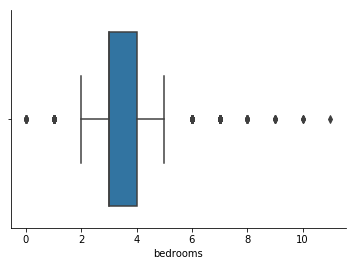

In [63]:
sns.boxplot(df['bedrooms'])
sns.despine()

max bedrooms =11

mean bedrooms=3




##bathrooms

In [70]:
df[['bathrooms']].describe()

,bathrooms
count,21613.000000
mean,2.114757
std,0.770163
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


 there are decimal no of bathrooms in the data which is not possible this is because
 
 In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower  and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).

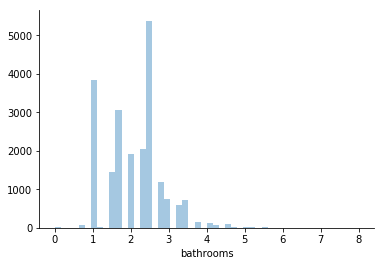

In [73]:
sns.distplot(df['bathrooms'],kde=False)
sns.despine()

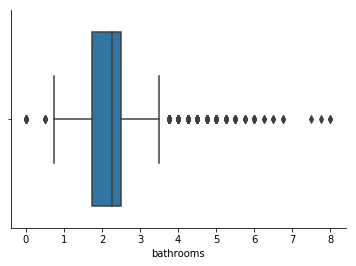

In [74]:
sns.boxplot(df['bathrooms'])
sns.despine()

mean bathrooms = 2.11
max bathrooms = 8.00

##Squarefeet living

In [75]:
df[['sqft_living']].describe()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


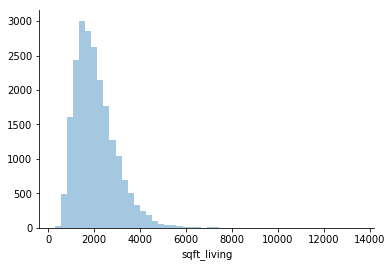

In [76]:
sns.distplot(df['sqft_living'],kde=False)
sns.despine()

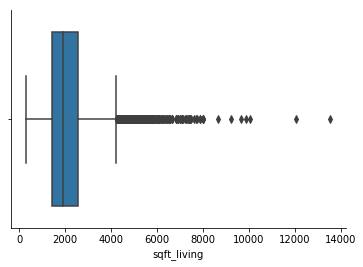

In [77]:
sns.boxplot(df['sqft_living'])
sns.despine()

mean square feet living = 2079.899736

max square  feet living = 13540.00

##Square feet lot

In [78]:
df[['sqft_lot']].describe()

,sqft_lot
count,2.161300e+04
mean,1.510697e+04
std,4.142051e+04
min,5.200000e+02
25%,5.040000e+03
50%,7.618000e+03
75%,1.068800e+04
max,1.651359e+06


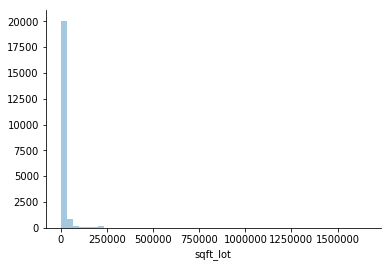

In [80]:
sns.distplot(df['sqft_lot'],kde=False)
sns.despine()

mostly values are in a same constant x axis so we take log of the data

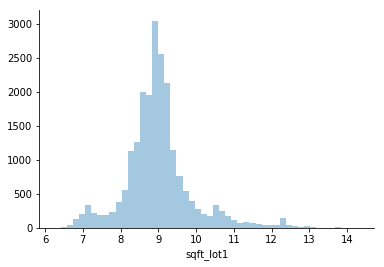

In [81]:
df['sqft_lot1']=np.log(df['sqft_lot'])
sns.distplot(df['sqft_lot1'],kde=False)
sns.despine()

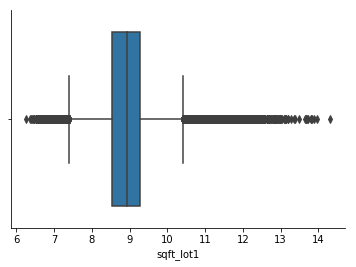

In [82]:
sns.boxplot(df['sqft_lot1'])
sns.despine()

mean sqft_lot= 7618 sqft

max sqft_lot= 1651359 sqft

##waterfront and views

we get to know how many houses are waterfront and how many times all the houses are been viewed

In [84]:
df[['waterfront']].sum()

waterfront    163
dtype: int64

163 houses are waterfront

In [85]:
df[['view']].describe()

,view
count,21613.000000
mean,0.234303
std,0.766318
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


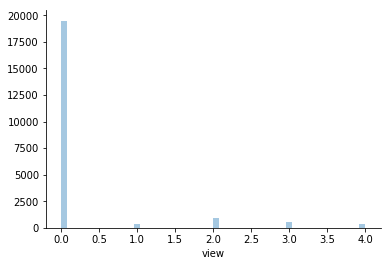

In [86]:
sns.distplot(df['view'],kde=False)
sns.despine()

In [92]:
df.query('view==0').count()

id               19489
date             19489
price            19489
bedrooms         19489
bathrooms        19489
sqft_living      19489
sqft_lot         19489
floors           19489
waterfront       19489
view             19489
condition        19489
grade            19489
sqft_above       19489
sqft_basement    19489
yr_built         19489
yr_renovated     19489
zipcode          19489
lat              19489
long             19489
sqft_living15    19489
sqft_lot15       19489
logp             19489
price0           19489
sqft_lot1        19489
dtype: int64

In [93]:
df.query('view==1').count()

id               332
date             332
price            332
bedrooms         332
bathrooms        332
sqft_living      332
sqft_lot         332
floors           332
waterfront       332
view             332
condition        332
grade            332
sqft_above       332
sqft_basement    332
yr_built         332
yr_renovated     332
zipcode          332
lat              332
long             332
sqft_living15    332
sqft_lot15       332
logp             332
price0           332
sqft_lot1        332
dtype: int64

In [94]:
df.query('view==2').count()

id               963
date             963
price            963
bedrooms         963
bathrooms        963
sqft_living      963
sqft_lot         963
floors           963
waterfront       963
view             963
condition        963
grade            963
sqft_above       963
sqft_basement    963
yr_built         963
yr_renovated     963
zipcode          963
lat              963
long             963
sqft_living15    963
sqft_lot15       963
logp             963
price0           963
sqft_lot1        963
dtype: int64

In [95]:
df.query('view==3').count()

id               510
date             510
price            510
bedrooms         510
bathrooms        510
sqft_living      510
sqft_lot         510
floors           510
waterfront       510
view             510
condition        510
grade            510
sqft_above       510
sqft_basement    510
yr_built         510
yr_renovated     510
zipcode          510
lat              510
long             510
sqft_living15    510
sqft_lot15       510
logp             510
price0           510
sqft_lot1        510
dtype: int64

In [96]:
df.query('view==4').count()

id               319
date             319
price            319
bedrooms         319
bathrooms        319
sqft_living      319
sqft_lot         319
floors           319
waterfront       319
view             319
condition        319
grade            319
sqft_above       319
sqft_basement    319
yr_built         319
yr_renovated     319
zipcode          319
lat              319
long             319
sqft_living15    319
sqft_lot15       319
logp             319
price0           319
sqft_lot1        319
dtype: int64

house with
 
 0 views=19489
 
 1 views=332
 
 2 views=963
 
 3 views=510
 
 4 views=319
 
 hence most of the houses are not viewed

##square feet above and basement